# CS210 - COURSE PROJECT: League Of Legends Match Analysis


I used my own League Of Legends match dataset. League Of Legends (LoL) is the most popular moba game. It's format is 5v5, you have 4 teammate and 5 oppenent. There is ranking system it matches the people same rank as you. There are over 100 champions and 5 roles in the game. I used LoL's official API documentation web site to create my dataset. There are 2-3 steps to get a match data. First you need a key to access API. You need to regenarate it every 24 hours. After you regenerate the API key, you have to get your own match Id's with your puuid code which is another security step. You can Max get 100 matches per request. After you get your match Ids. Send math your matchId one by one to take the detail of your match. There are several entities in data so I do not need some of them I get what I need. I use excel to create my dataset. The last step was joining my match data with champion dataset in another website with cooparete LoL. Because I will also analyse my dataset with which champion I play.  **I used 2 links to create my dataset. LoL Official API website:https://developer.riotgames.com and  https://leagueoflegends.fandom.com/wiki/List_of_champions which contains details of champions (alsa Official website of Lol(It is subdomain))**

Below, you can find all the set of features, provided in the dataset:

1. **IsWin:** I win the match or not.
2. **Duration:** How many minutes the match last.
3. **KDA:** How is your game score. Formula is (Kills+Assits)/Deaths.
4. **Role:** What is your lane in the match.
5. **ChampionName:** Which champion did I played with.
6. **Earn Gold:** How much gold did I earn for the entire game.
7. **Earn Gold Per Minute:** Divide earn gold to duration.
8. **Total Minions Killed:** Minion is a soldier which is a npc. When you farm them you earn gold and experience.
9. **Vision Score:** There is ward which is an item in the game. It provides vision to your team. It shows how many ward did you use and killed enemy ward.
10. **Vision Score Per Minute:** Divide vision socre to duration.
11. **Baron Kills:** A numerical value representing the number of barons by killed your team.
12. **Dragon Kills:** A numerical value representing the number of dragons by killed your team.
13. **Total Pings:** A numerical value indicating the instrumentalness of the song.
14. **Damage Per Minute:** You hit the enemies with your skills and normal attacks. It shows how many deamage did you deal per minute in entire match.
15. **Attack Range Of Champion:** There is a restricotion to your champion attack range. If the length between your enemy is more than your attack range you cannot attack to enemy.
16. **Adaptive Type:** It spesifies the demage type of your champion.
17. **Class Of Champion:** It determines the play style of your champion.
18. **Diffucult Rate:** It's value possible values are 1,2,3. 3 is the most complicated champion. 1 is easy to play.


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

## Getting Dataset from Excel

In [80]:
#2pts - show the first 3 rows
filepath = 'LeagueOfLegendsMatchDataSetLas.csv'
df = pd.read_csv(filepath)
df.head(3)

,Win,Duration(Min),KDA,Role,Champ,EarnedGold,EarnedGold Per Minute,Total Minions Killed,Vision Score,Vision Score Per Minute,Team Baron Kills,Team Dragon Kills,Total Pings,Damage Per Minute,Attack Range Of Champion,Adaptive Type,Class Of Champion,Diffuculty Rating
0,0,34,1.23,Carry,Varus,14883,NaN,226,11,0.338873,0,3,33,728,575,Phsical,Marksman,2
1,1,46,1.60,Carry,Karthus,22895,NaN,200,23,0.500000,3,3,30,1952,875,Magic,Mage,2
2,1,13,5.00,Support,Kindred,10695,NaN,44,0,0.000000,0,0,3,1243,500,Phsical,Marksman,3


In [27]:
import pandas as pd

mean_value = df['Win'].mean()
print("Mean of the boolean column:", mean_value)


Mean of the boolean column: 0.53


In [81]:

top_5_champs = df['Champ'].value_counts().head(5)
print(top_5_champs)


Champ
Sylas      14
Shaco      12
Viego      11
Belveth    10
Yone        7
Name: count, dtype: int64


In [82]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading a DataFrame

# Get the counts of the top 5 most frequent 'Champ' values
top_5_champs_counts = df['Champ'].value_counts().head(5)

# Total number of rows in the DataFrame
total_rows = len(df)

# Calculate the mean occurrence of each of the top 5 'Champ' values
mean_occurrences = top_5_champs_counts / total_rows

print("Mean occurrences of top 5 'Champ' values:")
print(mean_occurrences)


Mean occurrences of top 5 'Champ' values:
Champ
Sylas      0.14
Shaco      0.12
Viego      0.11
Belveth    0.10
Yone       0.07
Name: count, dtype: float64


In [84]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading a DataFrame

# Function to categorize the attack range
def categorize_range(attack_range):
    if attack_range < 200:
        return 'low'
    elif 200 <= attack_range <= 350:
        return 'medium'
    else:
        return 'high'

# Apply the function to categorize each row
df['Range_Category'] = df['Attack Range Of Champion'].apply(categorize_range)

# Group by the new category and calculate the mean
mean_by_category = df.groupby('Range_Category')['Attack Range Of Champion'].mean()

# Calculate the frequency of occurrence for each category
frequency_by_category = df['Range_Category'].value_counts()

# Kategori
print("\nFrequency of each category:")
print(frequency_by_category)
# Group by the new category and calculate win rate
win_rate_by_category = df.groupby('Range_Category')['Win'].mean()

print("Win Rate for each category:")
print(win_rate_by_category)


Frequency of each category:
Range_Category
low       60
high      26
medium    14
Name: count, dtype: int64
Win Rate for each category:
Range_Category
high      0.500000
low       0.516667
medium    0.642857
Name: Win, dtype: float64


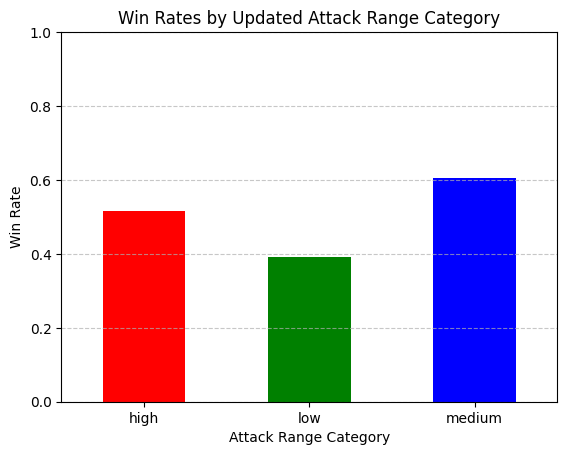

In [85]:
# Updating the categorization function according to the new criteria
def categorize_range_updated(attack_range):
    if attack_range < 150:
        return 'low'
    elif 150 <= attack_range <= 300:
        return 'medium'
    else:  # More than 300
        return 'high'

# Apply the updated function to categorize each row
df['Range_Category_Updated'] = df['Attack Range Of Champion'].apply(categorize_range_updated)

# Calculate the win rate for each updated category
win_rate_by_updated_category = df.groupby('Range_Category_Updated')['Win'].mean()

# Plotting the updated win rates for each category
win_rate_by_updated_category.plot(kind='bar', color=['red', 'green', 'blue'])

plt.title('Win Rates by Updated Attack Range Category')
plt.xlabel('Attack Range Category')
plt.ylabel('Win Rate')
plt.xticks(rotation=0)  # Keep the category names horizontal for readability
plt.ylim(0, 1)  # Set y-axis range to show percentages from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the updated plot
plt.show()


Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



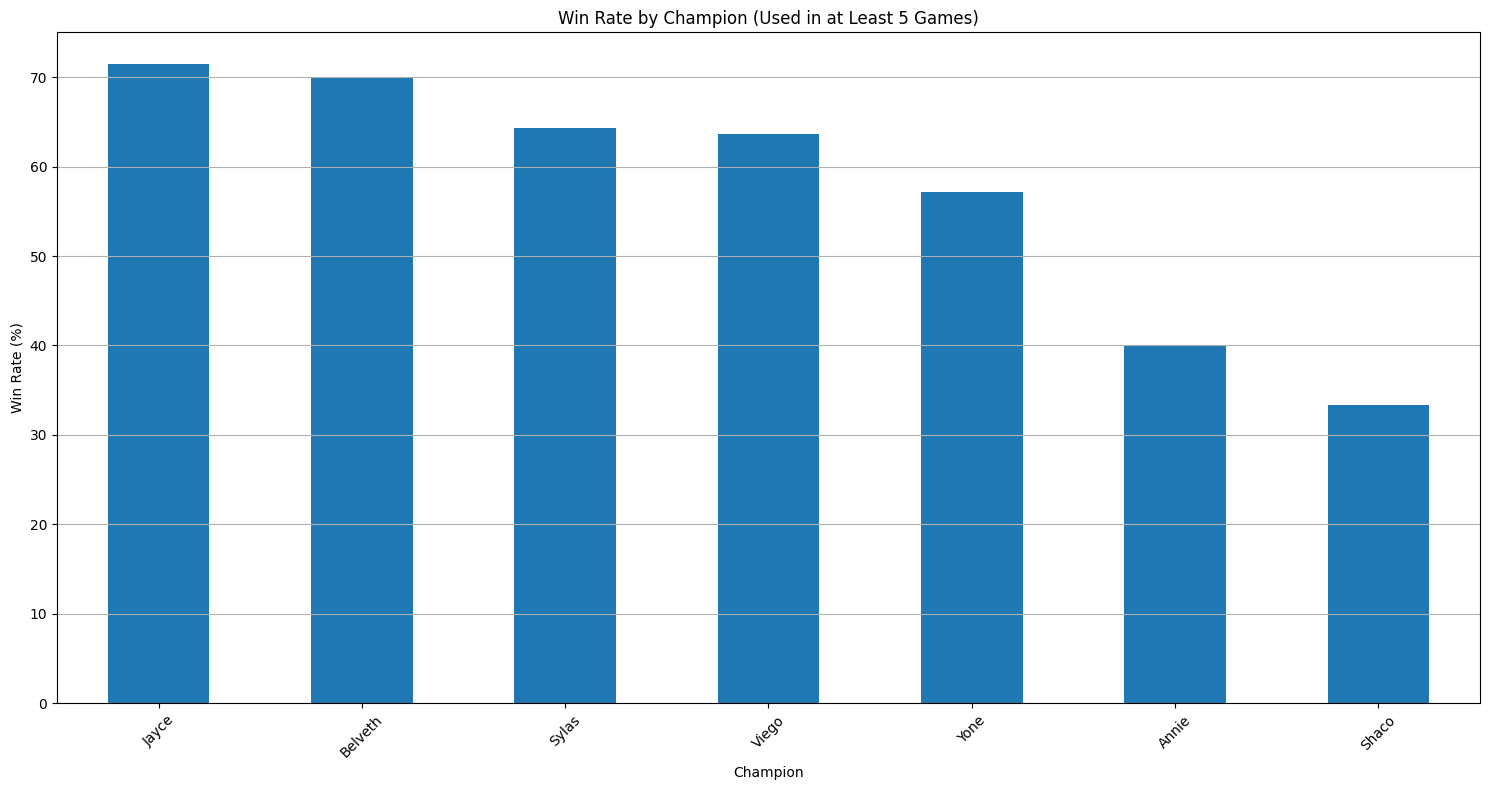

In [86]:
# Filter out champions with fewer than 5 games
champion_counts = df['Champ'].value_counts()
champions_to_include = champion_counts[champion_counts >= 5].index
df_filtered = df[df['Champ'].isin(champions_to_include)]

# Calculate win rate for each champion
win_rate_by_champion = df_filtered.groupby('Champ')['Win'].mean() * 100

# Sort the win rates for better visualization
win_rate_by_champion = win_rate_by_champion.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
win_rate_by_champion.plot(kind='bar')
plt.title('Win Rate by Champion (Used in at Least 5 Games)')
plt.xlabel('Champion')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

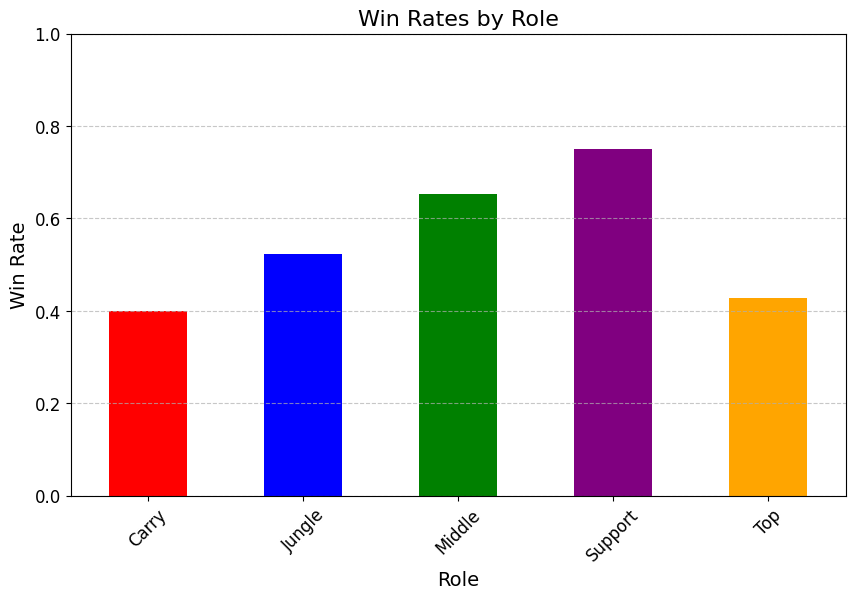

In [87]:
# Calculating the win rate for each role
win_rate_by_role = df.groupby('Role')['Win'].mean()

# Plotting the win rates for each role with different bar colors
plt.figure(figsize=(10, 6))
role_colors = ['red', 'blue', 'green', 'purple', 'orange']
win_rate_by_role.plot(kind='bar', color=role_colors)

plt.title('Win Rates by Role', fontsize=16)
plt.xlabel('Role', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis range to show percentages from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


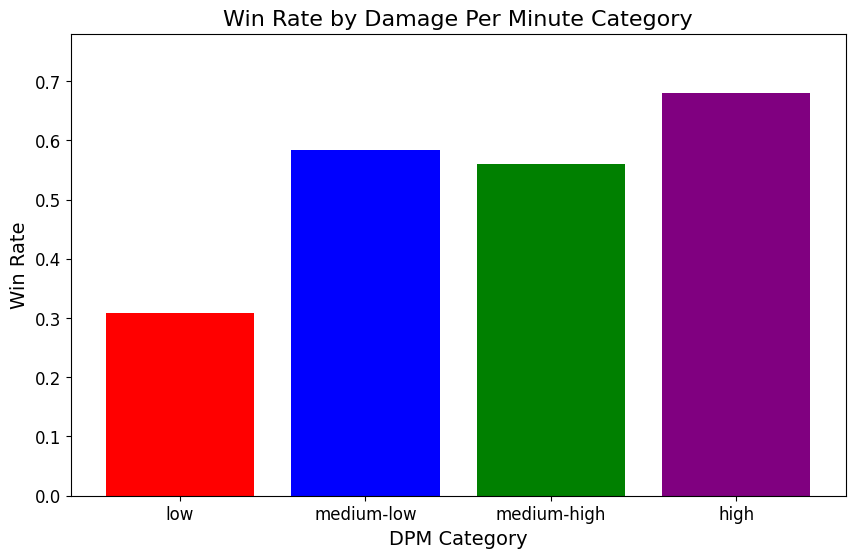

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorize 'Damage Per Minute' into quartiles
df['DPM_Category'] = pd.qcut(df['Damage Per Minute'], q=4, labels=['low', 'medium-low', 'medium-high', 'high'])

# Calculate win rates for each DPM category
# Calculate win rates for each DPM category, including only the observed categories
win_rate_by_dpm_category = df.groupby('DPM_Category', observed=True)['Win'].mean().reset_index()

# Creating a bar plot for the win rate by Damage Per Minute category
plt.figure(figsize=(10, 6))

# Specify the colors for each bar
colors = ['red', 'blue', 'green', 'purple']

# Create the bar plot
plt.bar(win_rate_by_dpm_category['DPM_Category'], win_rate_by_dpm_category['Win'], color=colors)

# Title and labels
plt.title('Win Rate by Damage Per Minute Category', fontsize=16)
plt.xlabel('DPM Category', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, win_rate_by_dpm_category['Win'].max() + 0.1)  # Add some space above the highest bar

plt.show()


Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


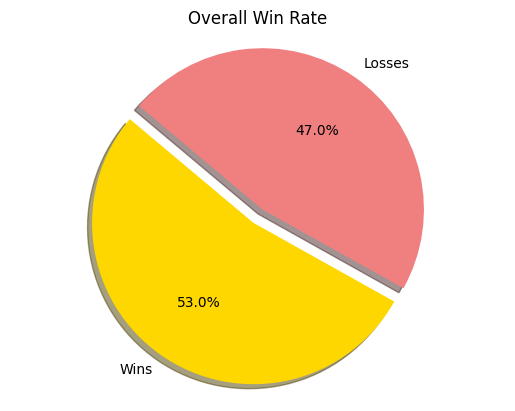

In [89]:
# Calculate the overall win rate based on total rows
overall_win_rate = df['Win'].mean()

# Display the overall win rate as a rounded visualization using a pie chart
labels = 'Wins', 'Losses'
sizes = [overall_win_rate, 1 - overall_win_rate]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Wins')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Overall Win Rate')
plt.show()


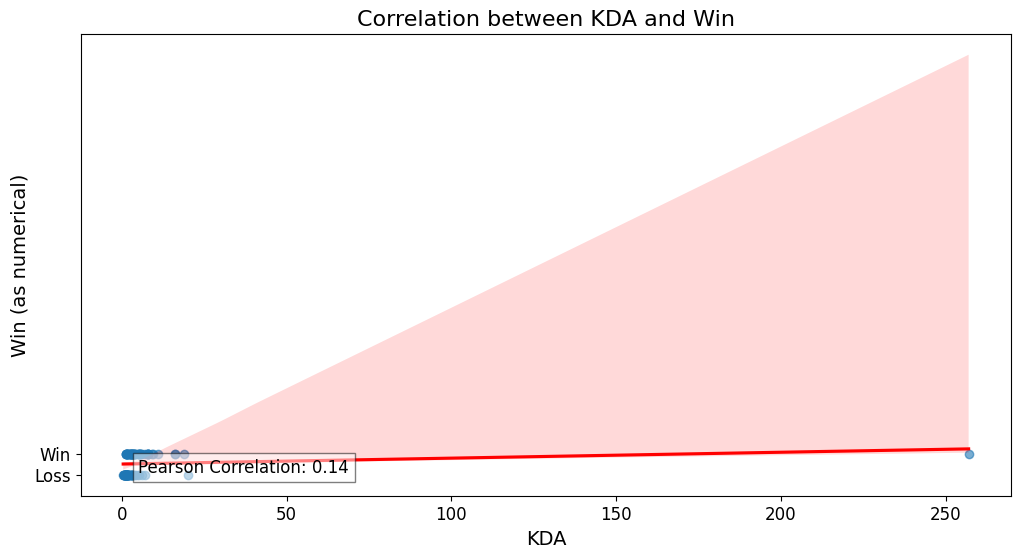

0.14441277839156585

In [90]:
# Calculating the Pearson correlation coefficient between 'KDA' and 'Win'
kda_correlation = df['KDA'].corr(df['Win'])

# Creating a scatter plot with a regression line to visualize the relationship between 'KDA' and 'Win'
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='KDA', y='Win', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

plt.title('Correlation between KDA and Win', fontsize=16)
plt.xlabel('KDA', fontsize=14)
plt.ylabel('Win (as numerical)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0, 1], ['Loss', 'Win'], fontsize=12)  # Representing 0 as Loss and 1 as Win

# Display the correlation coefficient on the plot
plt.text(5, 0.1, f'Pearson Correlation: {kda_correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Display the plot
plt.show()

kda_correlation


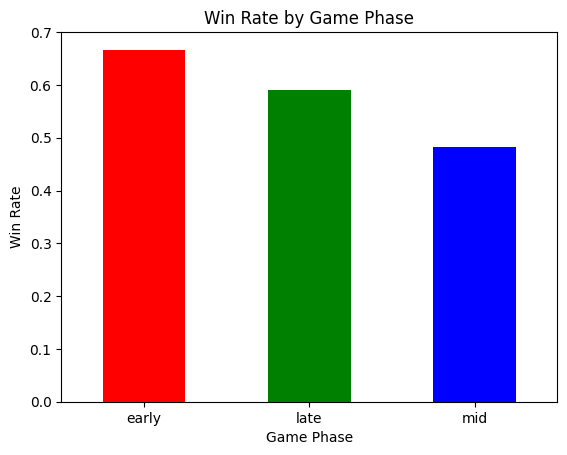

(Game_Phase
 early    0.666667
 late     0.589744
 mid      0.482759
 Name: Win, dtype: float64,
 (15.510000000000002, 31.020000000000003, 47))

In [91]:
# Redefine the categorization with appropriate cut-off points for 'early', 'mid', and 'late'
# We will assume early is 0-33%, mid is 34-66%, and late is 67-100% of the match durations.

# Find the max duration to set the boundaries for the categories
max_duration = df['Duration(Min)'].max()

# Define the boundaries for 'early', 'mid', and 'late' game
early_cutoff = max_duration * 0.33
mid_cutoff = max_duration * 0.66

# Categorize the durations
df['Game_Phase'] = df['Duration(Min)'].apply(lambda x: 'early' if x <= early_cutoff
                                                        else ('mid' if x <= mid_cutoff else 'late'))

# Calculate win rates for the new categories
win_rate_by_game_phase = df.groupby('Game_Phase')['Win'].mean()

# Now, let's plot the bar chart again with standard colors
colors = ['red', 'green', 'blue']  # Standard colors for matplotlib
win_rate_by_game_phase.plot(kind='bar', color=colors)

plt.title('Win Rate by Game Phase')
plt.xlabel('Game Phase')
plt.ylabel('Win Rate')
plt.xticks(rotation=0)  # Keep the labels horizontal
plt.show()

win_rate_by_game_phase, (early_cutoff, mid_cutoff, max_duration)


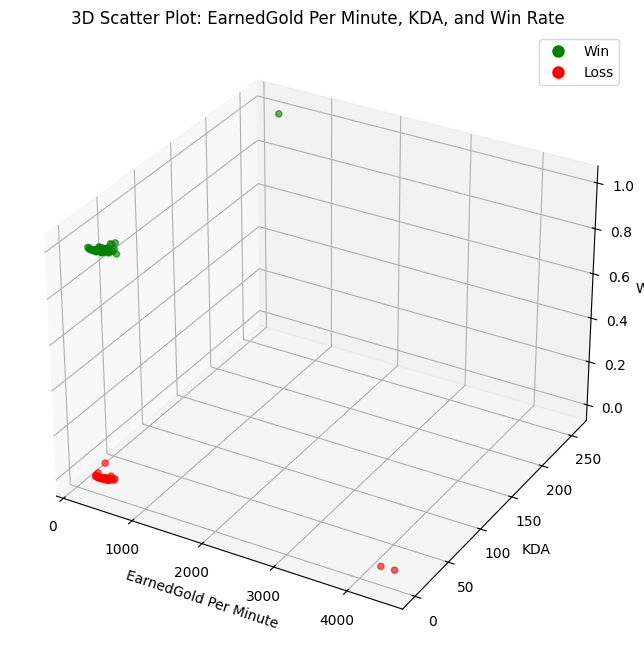

In [92]:
# To analyze the relationship between 'EarnedGold Per Minute', 'KDA', and 'Win Rate', we can use a scatter plot
# However, since we are dealing with three variables, a 3D scatter plot might be more appropriate

from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapping 'Win' to colors
colors = df['Win'].map({1: 'green', 0: 'red'})

# Scatter plot
scatter = ax.scatter(df['EarnedGold Per Minute'], df['KDA'], df['Win'], c=colors, marker='o', alpha=0.6)

# Labels and title
ax.set_xlabel('EarnedGold Per Minute')
ax.set_ylabel('KDA')
ax.set_zlabel('Win')
ax.set_title('3D Scatter Plot: EarnedGold Per Minute, KDA, and Win Rate')

# Legend
win_patch = plt.Line2D([0], [0], marker='o', color='w', label='Win', markersize=10, markerfacecolor='green')
loss_patch = plt.Line2D([0], [0], marker='o', color='w', label='Loss', markersize=10, markerfacecolor='red')
ax.legend(handles=[win_patch, loss_patch])

# Show plot
plt.show()


Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

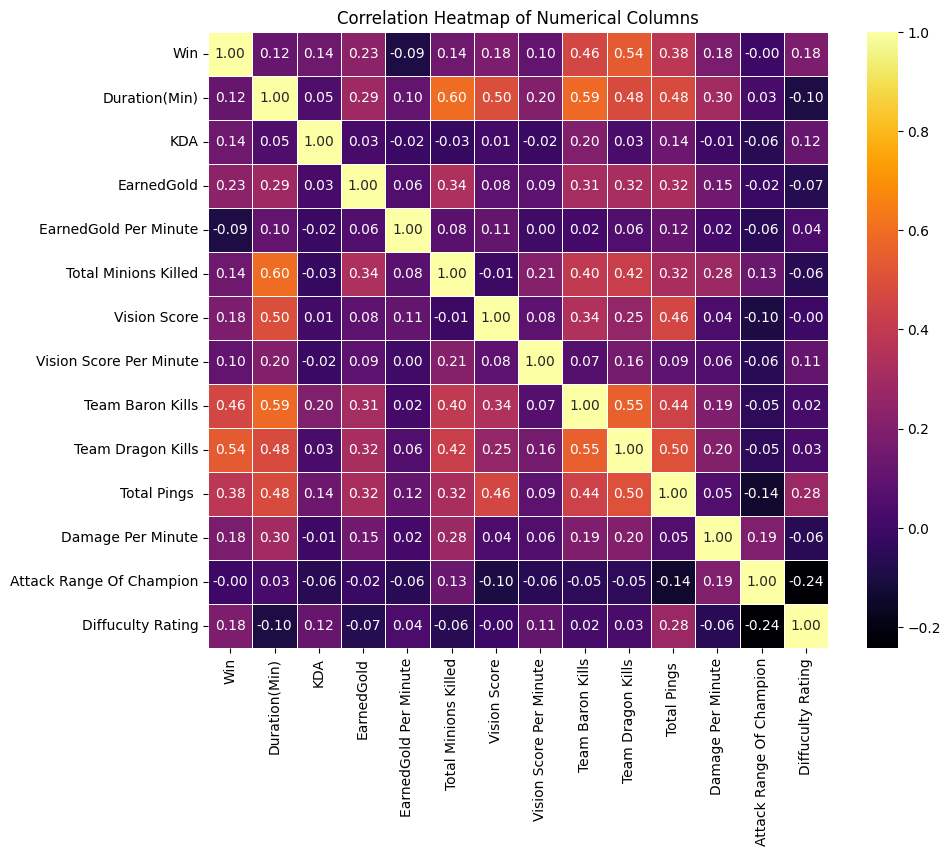

In [93]:
#4pts
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with numerical columns

# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt=".2f", linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()


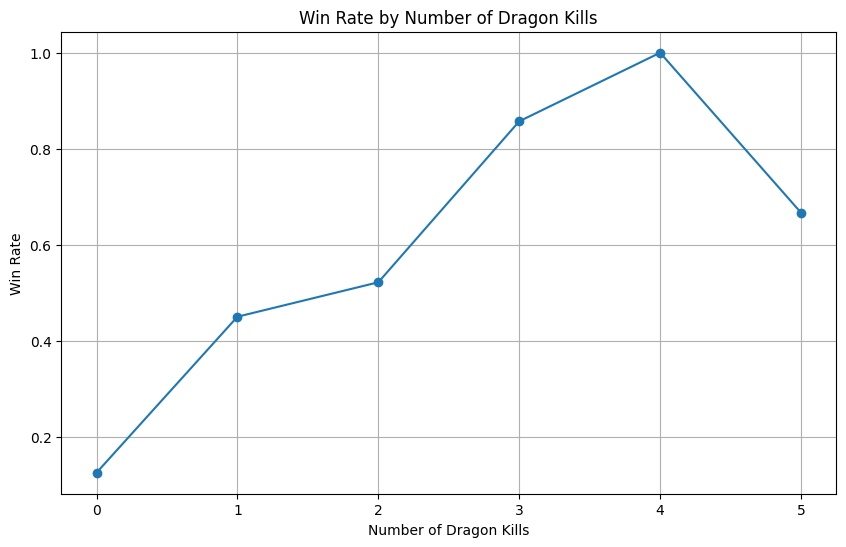

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been loaded correctly.
# Isolating the 'Team Dragon Kills' and 'Win' columns to analyze the relationship
dragon_win_data = df[['Team Dragon Kills', 'Win']]

# Grouping by the number of dragon kills to see the average win rate per dragon kill count
dragon_win_rate = dragon_win_data.groupby('Team Dragon Kills')['Win'].mean()

# Reset index to make 'Team Dragon Kills' a column again for easier plotting
dragon_win_rate = dragon_win_rate.reset_index()

# Plotting the relationship between dragon kills and win rate
plt.figure(figsize=(10, 6))
plt.plot(dragon_win_rate['Team Dragon Kills'], dragon_win_rate['Win'], marker='o')
plt.title('Win Rate by Number of Dragon Kills')
plt.xlabel('Number of Dragon Kills')
plt.ylabel('Win Rate')
plt.grid(True)
plt.show()


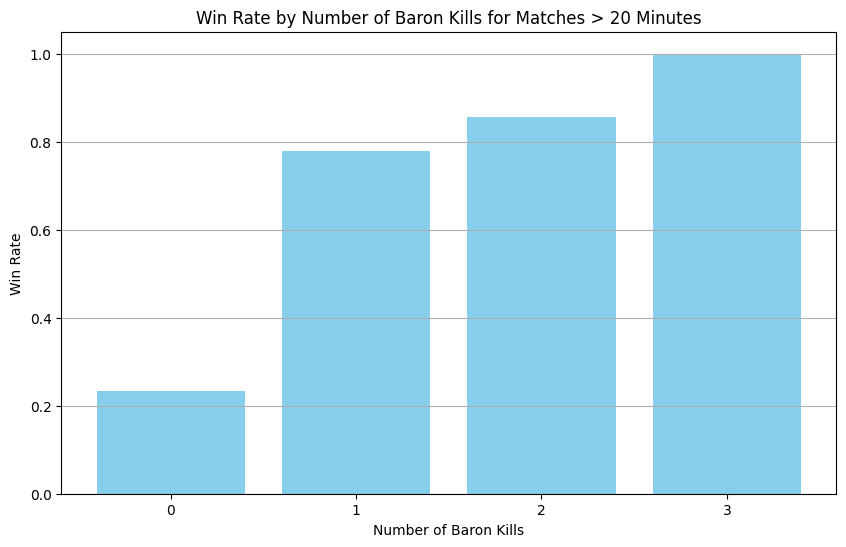

In [95]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtering the DataFrame for matches with duration greater than 20 minutes
df_duration_gt_20 = df[df['Duration(Min)'] > 20]

# Grouping by the number of baron kills to see the average win rate for those matches
baron_win_rate = df_duration_gt_20.groupby('Team Baron Kills')['Win'].mean().reset_index()

# Plotting the relationship between baron kills and win rate for matches longer than 20 minutes
plt.figure(figsize=(10, 6))
plt.bar(baron_win_rate['Team Baron Kills'], baron_win_rate['Win'], color='skyblue')

plt.title('Win Rate by Number of Baron Kills for Matches > 20 Minutes')
plt.xlabel('Number of Baron Kills')
plt.ylabel('Win Rate')
plt.xticks(baron_win_rate['Team Baron Kills'])
plt.grid(axis='y')

plt.show()


C:\Users\aliem\AppData\Local\Temp\ipykernel_21776\3053363381.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_minions = df.groupby('Total Minions Killed Range')['Win'].mean() * 100


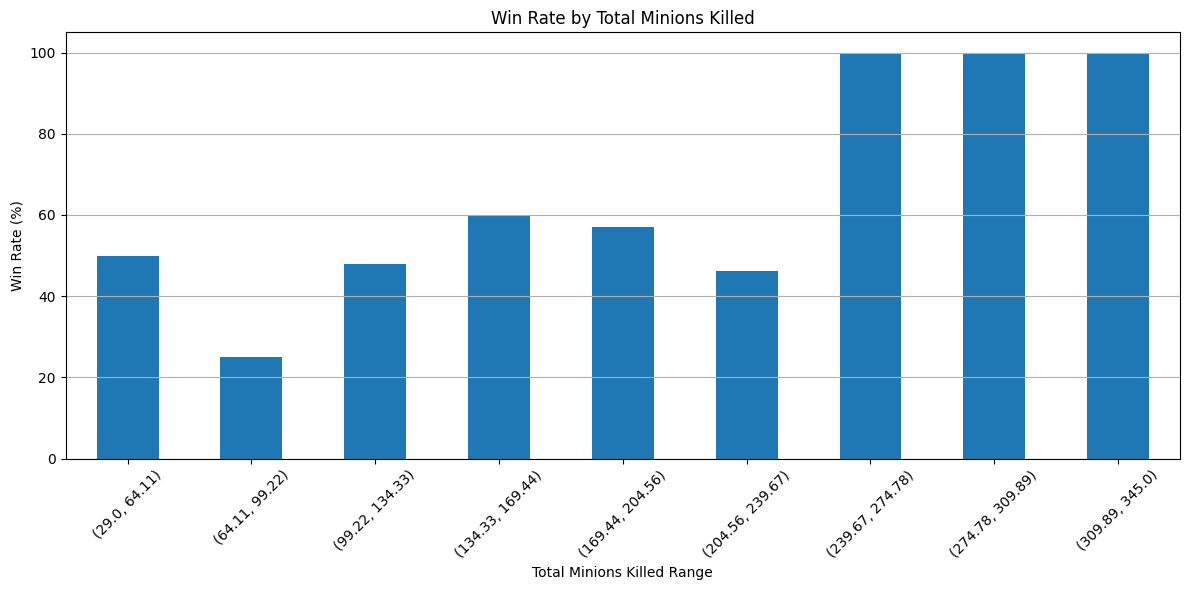

In [96]:

# Define bins for total minions killed, using 10 groups
bins = np.linspace(df['Total Minions Killed'].min(), df['Total Minions Killed'].max(), 10)
labels = [(round(bins[i], 2), round(bins[i+1], 2)) for i in range(len(bins)-1)]
df['Total Minions Killed Range'] = pd.cut(df['Total Minions Killed'], bins=bins, labels=labels, include_lowest=True)

# Group by total minions killed range and calculate win rate
win_rate_by_minions = df.groupby('Total Minions Killed Range')['Win'].mean() * 100

# Plotting
plt.figure(figsize=(12, 6))
win_rate_by_minions.plot(kind='bar')
plt.title('Win Rate by Total Minions Killed')
plt.xlabel('Total Minions Killed Range')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\aliem\AppData\Local\Temp\ipykernel_21776\266567409.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_bin = df.groupby('Vision Score Per Minute Bin')['Win'].mean()


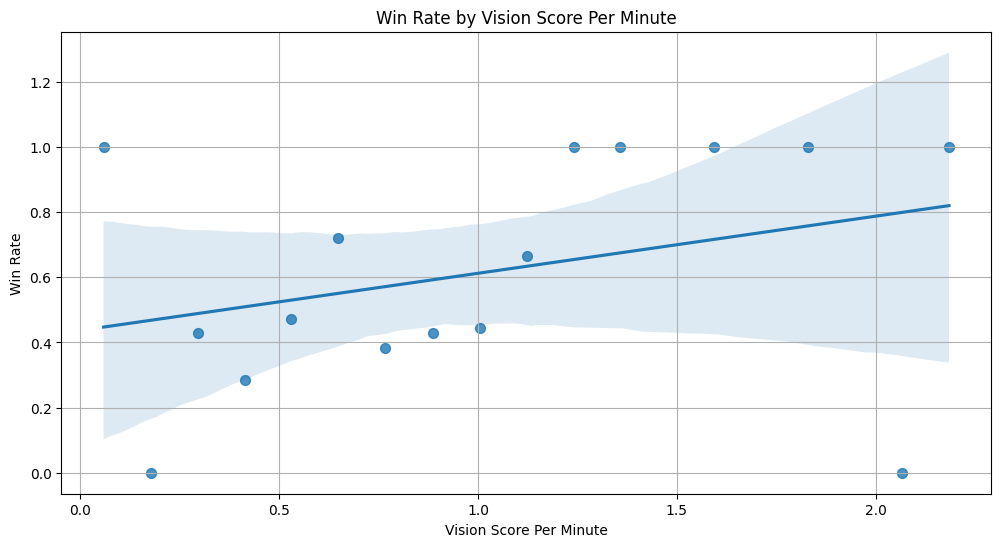

In [97]:

# Ensure no division by zero
df = df[df['Duration(Min)'] > 0]

# Calculate vision score per minute
df['Vision Score Per Minute'] = df['Vision Score'] / df['Duration(Min)']

# Define bins for vision score per minute
bins = np.linspace(df['Vision Score Per Minute'].min(), df['Vision Score Per Minute'].max(), 20)
df['Vision Score Per Minute Bin'] = pd.cut(df['Vision Score Per Minute'], bins=bins, include_lowest=True)

# Calculate mean vision score per minute and win rate for each bin
bin_centers = [interval.mid for interval in df['Vision Score Per Minute Bin'].cat.categories]
win_rate_by_bin = df.groupby('Vision Score Per Minute Bin')['Win'].mean()

# Prepare a DataFrame for plotting
plot_data = pd.DataFrame({
    'Vision Score Per Minute': bin_centers,
    'Win Rate': win_rate_by_bin.values
})

# Plotting
plt.figure(figsize=(12, 6))
sns.regplot(x='Vision Score Per Minute', y='Win Rate', data=plot_data, fit_reg=True, scatter_kws={'s': 50})
plt.title('Win Rate by Vision Score Per Minute')
plt.xlabel('Vision Score Per Minute')
plt.ylabel('Win Rate')
plt.grid(True)
plt.show()

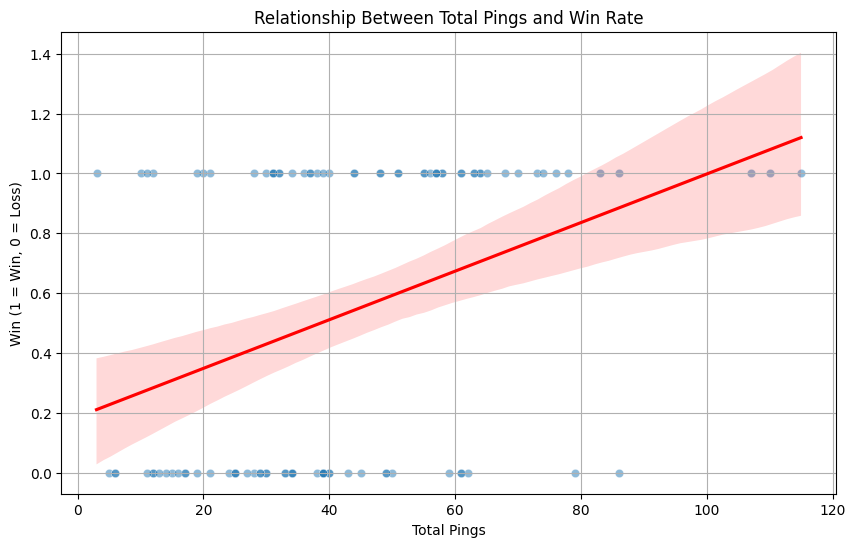

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Pings ', y='Win', data=df, alpha=0.5)
sns.regplot(x='Total Pings ', y='Win', data=df, scatter=False, color='red')

plt.title('Relationship Between Total Pings and Win Rate')
plt.xlabel('Total Pings')
plt.ylabel('Win (1 = Win, 0 = Loss)')
plt.grid(True)
plt.show()

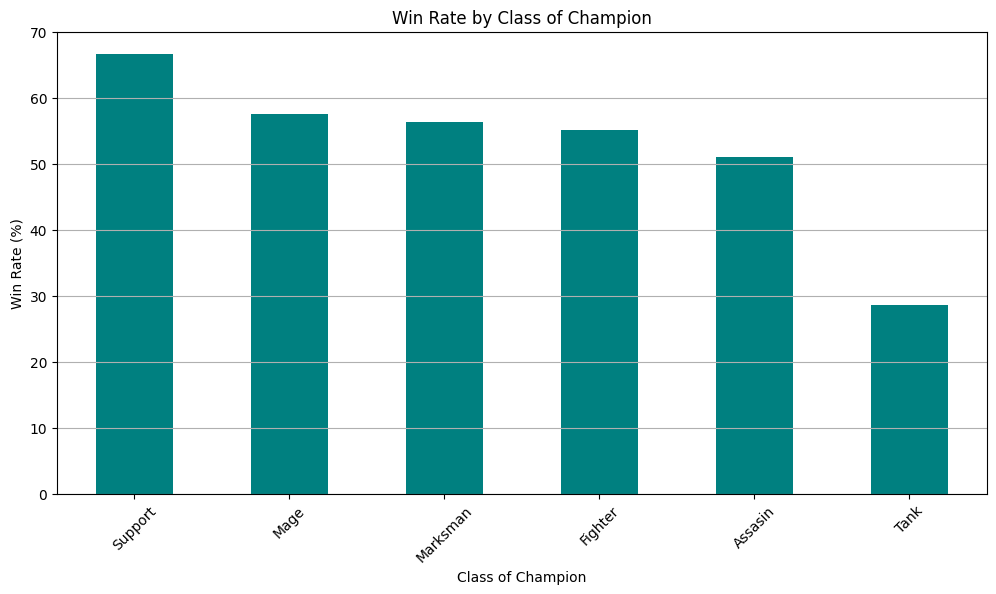

In [99]:
df_expanded = df.drop('Class Of Champion', axis=1).join(
    df['Class Of Champion'].str.split('-', expand=True).stack().reset_index(level=1, drop=True).rename('Class')
)

# Calculating win rates for each class
win_rate_by_class = df_expanded.groupby('Class')['Win'].mean() * 100

# Sorting the win rates for a better visualization
win_rate_by_class_sorted = win_rate_by_class.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
win_rate_by_class_sorted.plot(kind='bar', color='teal')
plt.title('Win Rate by Class of Champion')
plt.xlabel('Class of Champion')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

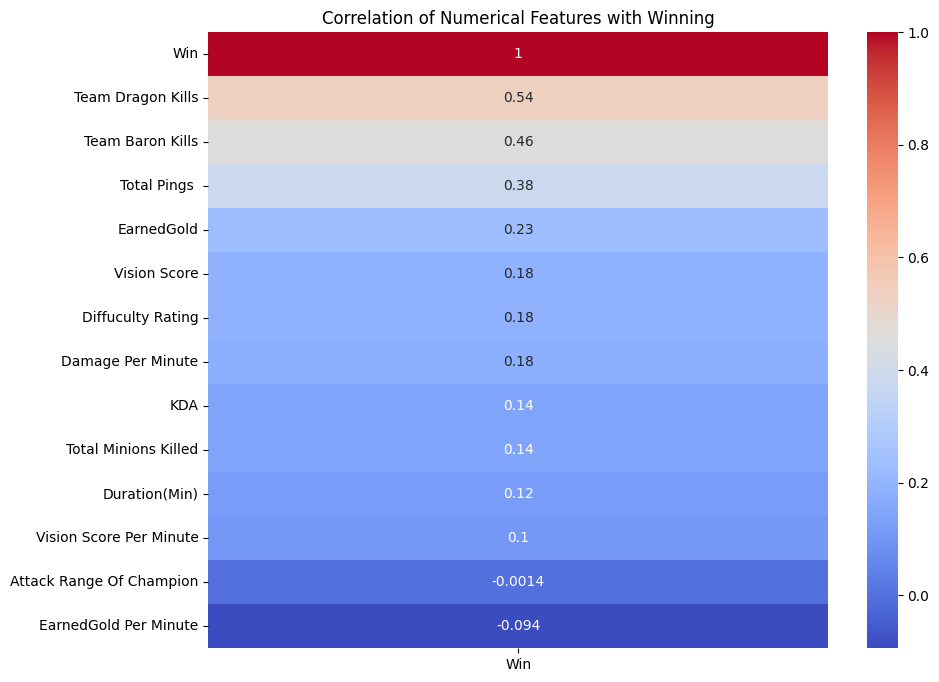

In [101]:
# Plotting the correlation matrix with respect to 'Win' column
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Win']].sort_values(by='Win', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Numerical Features with Winning")
plt.show()

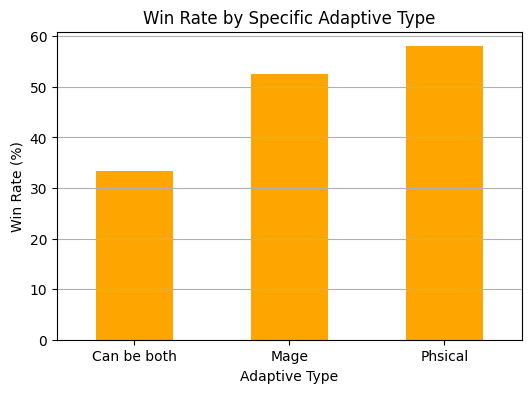

In [102]:
df['Adaptive Type'] = df['Adaptive Type'].replace({'Magic': 'Mage', 'Physical': 'Phsical'})

# Calculating win rates for the specified adaptive types
win_rate_by_specific_adaptive_type = df.groupby('Adaptive Type')['Win'].mean() * 100

# Plotting
plt.figure(figsize=(6, 4))
win_rate_by_specific_adaptive_type.plot(kind='bar', color='orange')
plt.title('Win Rate by Specific Adaptive Type')
plt.xlabel('Adaptive Type')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


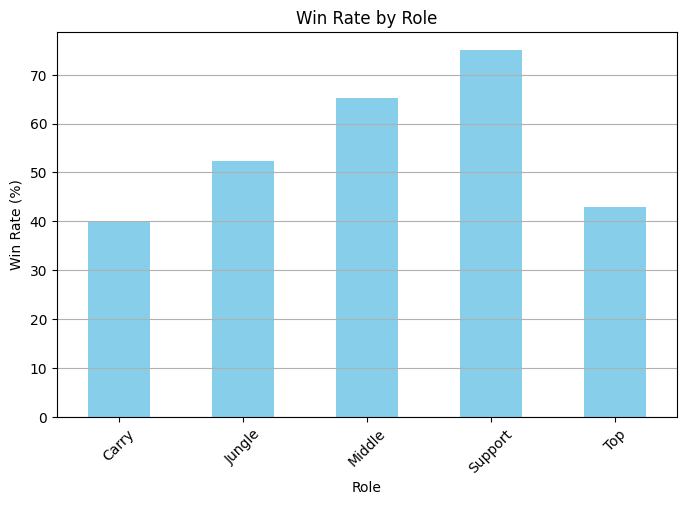

In [103]:
# Assuming df is your DataFrame
win_rate_by_role = df.groupby('Role')['Win'].mean() * 100

# Plotting
plt.figure(figsize=(8, 5))
win_rate_by_role.plot(kind='bar', color='skyblue')
plt.title('Win Rate by Role')
plt.xlabel('Role')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()